In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import namedtuple
from functools import lru_cache
import re
import unicodedata
import sys
from collections import Counter
from nltk.corpus import brown
from nltk import word_tokenize

In [2]:
Dataset = namedtuple('Dataset', 'name, train, test')
Model = namedtuple('Model', 'type, name, dimension, corpus, model')

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)
MAIN_PATH_DATASET = '../dataset/cwishareddataset/'
genres = ['Wikipedia', 'WikiNews', 'News']
columns = ['id', 'sentence', "start", "end", "target",  "nat", "non_nat", "nat_marked", "non_nat_marked", "binary", "prob"]


datasets = [Dataset('Wikipedia', 'Train', 'Dev'),
            Dataset('WikiNews', 'Train', 'Dev'),
            Dataset('News', 'Train', 'Dev')]

feature_categories = []

def load_df(path):
    df = pd.read_csv(path, header=None, sep = "\t")
    df.columns = columns
    return df

datasets = [Dataset(d.name, load_df(MAIN_PATH_DATASET + d.name + '_' + d.train + '.tsv'),
                            load_df(MAIN_PATH_DATASET + d.name + '_' + d.test + '.tsv'))
                            for d in datasets]

In [4]:
datasets[0].train

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob
0,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",0,8,Normally,10,10,0,1,1,0.05
1,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",28,34,passed,10,10,0,1,1,0.05
2,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",15,19,land,10,10,0,0,0,0.00
3,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,49,future,10,10,1,0,1,0.05
4,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,61,future generations,10,10,1,2,1,0.15
...,...,...,...,...,...,...,...,...,...,...,...
5546,3ZUE82NE0A2B8701X4995O8OCRS8FL,"An actor ( sometimes actress for female ; see terminology ) is a person who acts in a dramatic or comic production and who works in film , television , theater , or radio in that capacity .",123,128,works,10,10,0,0,0,0.00
5547,3ZUE82NE0A2B8701X4995O8OCRS8FL,"An actor ( sometimes actress for female ; see terminology ) is a person who acts in a dramatic or comic production and who works in film , television , theater , or radio in that capacity .",132,136,film,10,10,0,0,0,0.00
5548,3ZUE82NE0A2B8701X4995O8OCRS8FL,"An actor ( sometimes actress for female ; see terminology ) is a person who acts in a dramatic or comic production and who works in film , television , theater , or radio in that capacity .",139,149,television,10,10,0,0,0,0.00
5549,3ZUE82NE0A2B8701X4995O8OCRS8FL,"An actor ( sometimes actress for female ; see terminology ) is a person who acts in a dramatic or comic production and who works in film , television , theater , or radio in that capacity .",152,159,theater,10,10,0,0,0,0.00


In [5]:
datasets[0].test

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob
0,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,4,8,tail,10,10,0,2,1,0.10
1,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,12,25,Epidexipteryx,10,10,6,3,1,0.45
2,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,31,35,bore,10,10,0,3,1,0.15
3,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,31,53,bore unusual vertebrae,10,10,0,1,1,0.05
4,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,36,53,unusual vertebrae,10,10,2,0,1,0.10
...,...,...,...,...,...,...,...,...,...,...,...
689,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,100,109,knowledge,10,10,0,2,1,0.10
690,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,74,80,person,10,10,0,0,0,0.00
691,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,95,99,true,10,10,0,0,0,0.00
692,3W0KKJIARRAMOTSFYF06L10TKN9K8Z,Devotion ( Bhakti ) will cancel the effects of bad Karma and will bring a person closer to the true knowledge by purifying his mind .,113,122,purifying,10,10,7,8,1,0.75


Load embedding model:

In [6]:
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

MAIN_PATH = '../model/embeddings/'

glove_models = []

glove_defs = [ Model('glove', 'glove.6B.300d.txt', 300, 'wikipedia+gigaword5', None)]

for model in glove_defs:
    glove_file = MAIN_PATH + model.name
    tmp_file = get_tmpfile(model.name + '-temp')
    glove2word2vec(glove_file, tmp_file)
    vecs = KeyedVectors.load_word2vec_format(tmp_file)
    glove_models.append(Model(model.type, model.name, model.dimension, model.corpus, vecs))
    print('load model : {}'.format(model.name))

glove_models

/tmp/ipykernel_4892/3443068647.py:14: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, tmp_file)


load model : glove.6B.300d.txt


[Model(type='glove', name='glove.6B.300d.txt', dimension=300, corpus='wikipedia+gigaword5', model=<gensim.models.keyedvectors.KeyedVectors object at 0x7f32e3ff9b10>)]

Process dataset:

In [7]:
datasets.append(Dataset('train_all_test_wiki', datasets[0].train.append(datasets[1].train).append(datasets[2].train), datasets[0].test.append(datasets[1].test).append(datasets[2].test)))

/tmp/ipykernel_4892/1727327338.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets.append(Dataset('train_all_test_wiki', datasets[0].train.append(datasets[1].train).append(datasets[2].train), datasets[0].test.append(datasets[1].test).append(datasets[2].test)))
/tmp/ipykernel_4892/1727327338.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datasets.append(Dataset('train_all_test_wiki', datasets[0].train.append(datasets[1].train).append(datasets[2].train), datasets[0].test.append(datasets[1].test).append(datasets[2].test)))


In [8]:
datasets[3].test

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob
0,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,4,8,tail,10,10,0,2,1,0.10
1,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,12,25,Epidexipteryx,10,10,6,3,1,0.45
2,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,31,35,bore,10,10,0,3,1,0.15
3,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,31,53,bore unusual vertebrae,10,10,0,1,1,0.05
4,3QI9WAYOGQCX8YMZA9CAS9VCVMWS62,The tail of Epidexipteryx also bore unusual vertebrae towards the tip which resembled the feather-anchoring pygostyle of modern birds and some oviraptorosaurs .,36,53,unusual vertebrae,10,10,2,0,1,0.10
...,...,...,...,...,...,...,...,...,...,...,...
1759,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",128,132,past,10,10,0,0,0,0.00
1760,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",139,144,years,10,10,0,0,0,0.00
1761,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",157,166,estimated,10,10,2,2,1,0.20
1762,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",146,148,de,10,10,0,0,0,0.00


In [9]:
# Append train and test set
dataset_sel = datasets[3]
train_num_rows = dataset_sel.train.shape[0]
train_num_sents = len(list(set(dataset_sel.train.sentence.values.tolist())))

test_num_rows = dataset_sel.test.shape[0]
test_num_sents = len(list(set(dataset_sel.test.sentence.values.tolist())))

dataset = dataset_sel.train.append(dataset_sel.test)
dataset['sent_id'] = dataset.groupby('sentence').ngroup()
dataset_num_rows = dataset.shape[0]
dataset_num_sents = len(list(set(dataset.sentence.values.tolist())))

print('# Rows train : {}'.format(train_num_rows))
print('# Rows test : {}'.format(test_num_rows))
print('# Rows dataset : {}'.format(dataset_num_rows))

print('# Sents train : {}'.format(train_num_sents))
print('# Sents test : {}'.format(test_num_sents))
print('# Sents dataset : {}'.format(dataset_num_sents))

# Rows train : 27299
# Rows test : 3328
# Rows dataset : 30627
# Sents train : 1988
# Sents test : 266
# Sents dataset : 2231


/tmp/ipykernel_4892/1722555504.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset_sel.train.append(dataset_sel.test)


In [10]:
dataset

,id,sentence,start,end,target,nat,non_nat,nat_marked,non_nat_marked,binary,prob,sent_id
0,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",0,8,Normally,10,10,0,1,1,0.05,1481
1,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",28,34,passed,10,10,0,1,1,0.05,1481
2,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",15,19,land,10,10,0,0,0,0.00,1481
3,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,49,future,10,10,1,0,1,0.05,1481
4,3XU9MCX6VODXPI3L8I02CM94TFB2R7,"Normally , the land will be passed down to future generations in a way that recognizes the community 's traditional connection to that country .",43,61,future generations,10,10,1,2,1,0.15,1481
...,...,...,...,...,...,...,...,...,...,...,...,...
1759,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",128,132,past,10,10,0,0,0,0.00,2025
1760,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",139,144,years,10,10,0,0,0,0.00,2025
1761,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",157,166,estimated,10,10,2,2,1,0.20,2025
1762,37PGLWGSJT7FDZ4S71CXYQU7J7EIKD,"The state will put less than 15 billion euros into the latest of the four separate bank rescues that Spain has enacted over the past three years, de Guindos estimated.",146,148,de,10,10,0,0,0,0.00,2025


In [11]:
wordlist_lowercased = set(i.lower() for i in brown.words())
len(wordlist_lowercased)

49815

In [12]:
def forward_transformation(dataframe, lowercase = True, filter_punc = True, filtering = "a132"):
    grouped = dataframe.groupby('sentence').apply(lambda row :
                        {'sent_id' : list(set(row['sent_id']))[0],
                         'sentence' : list(set(row['sentence']))[0],
                         'tags': [tag for tag in zip(row['target'], row['start'], row['end'], row['binary'], row['prob'])]})
    sentences = []
    for vals in grouped:
        sent_id = vals['sent_id']
        sentence = vals['sentence']
        tags = vals['tags']
        tags_without_labels = [(word, start, end) for word, start, end, binary, prob in tags]
        all_tokens = all_tokens_with_index(sentence)
        sent_repr = [(word, start, end, tags[tags_without_labels.index((word, start, end))][3], tags[tags_without_labels.index((word, start, end))][4])
                     if (word, start, end) in tags_without_labels
                     else (word, start, end, 0, 0.0)
                     for word, index, start, end in all_tokens]
        if lowercase:
            sent_repr = [(word.lower(), start, end, binary, prob) for word, start, end, binary, prob in sent_repr]
        if filter_punc:
            sent_repr = list(filter(lambda vals : remove_punctuation(vals[0]), sent_repr))
        if filtering:
            sent_repr = list(filter(lambda vals : vals[0] != "'s", sent_repr))
            sent_repr = list(filter(lambda vals : vals[0] != "``", sent_repr))
        sentences.append({'sent_id' : sent_id, 'sentence' : sentence, 'seq' : sent_repr})
    return sentences

tbl = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

@lru_cache(maxsize=None)
def all_tokens_with_index(context):
    curr_pos = 0
    targets = []
    j = 0
    w = 0
    curr_split = ''
    ctx_split = context.split()
    whitespaces = re.findall('\s+', context)
    num_whitespaces = [len(token) for token in whitespaces]
    num_whitespaces.append(1)
    tokens = word_tokenize(context)
    tokens = ['"' if token not in context else token for token in tokens]
    for index, token in enumerate(tokens, 1):
        targets.append((token, index, curr_pos, (curr_pos + len(token))))
        curr_pos += len(token)
        curr_split += token
        if ctx_split[j] == curr_split:
            curr_pos += num_whitespaces[w]
            j += 1
            w += 1
            curr_split = ''
    return [val for val in targets if val[0] != '"']

def remove_punctuation(text):
    return text.translate(tbl)

def split_sentence_seqs(sentences):
    words, start_end, binary, prob = [], [], [] ,[]
    for sent in sentences:
        sequence = sent['seq']
        curr_w, curr_se, curr_b, curr_p = map(list, zip(*[(vals[0],
            (vals[1], vals[2]), vals[3], vals[4]) for vals in sequence]))
        words.append(curr_w)
        start_end.append(curr_se)
        binary.append(curr_b)
        prob.append(curr_p)
    return words, start_end, binary, prob

def build_vocabulary(sentences, embedding_model, dimension):
    all_words = [tpl[0] for sentence in sentences for tpl in sentence['seq']] + list(wordlist_lowercased)
    print('# Words : {}'.format(len(all_words)))
    counter = Counter(all_words)
    vocab_size = len(counter) + 1
    print('# Vocab : {}'.format(vocab_size))
    print('# embeding model  : {}'.format(len(embedding_model.index_to_key)))
    word2index = {word : index for index, (word, count) in enumerate(counter.most_common(), 1)}
    index2word = {index : word for word, index in word2index.items()}
    # +1 required for pad token
    embedding_matrix = np.zeros((vocab_size, dimension))
    missing_embed_words = []
    for word, index in word2index.items():
        if word in embedding_model.index_to_key:
            embedding = embedding_model[word]
        else:
            missing_embed_words.append(word)
            continue
        embedding_matrix[index] = embedding
    missing_embed_count = len(missing_embed_words)
    print('# Words missing embedding : {}'.format(missing_embed_count))
    print('Embedding shape : {}'.format(embedding_matrix.shape))
    return word2index, index2word, embedding_matrix

In [13]:
sentences = forward_transformation(dataset)
train_sentences = sentences[:train_num_sents]
test_sentences = sentences[train_num_sents:]

In [14]:
words, start_end, binary, prob = split_sentence_seqs(sentences)

In [15]:
sentence_lens = [len(sent) for sent in words]

The dimensions of the embedding and vectors for the model:

In [16]:
embedding_model = glove_models[0].model
dimension = embedding_model.vector_size
word2index, index2word, embedding = build_vocabulary(sentences, embedding_model, dimension)

# Words : 100570
# Vocab : 52653
# embeding model  : 400000
# Words missing embedding : 9869
Embedding shape : (52653, 300)


Padding the input sequences and get the binaries labels:

In [17]:
words_with_indices = [[word2index[word] for word in sent] for sent in words]
sent_lens = [len(sentence['seq']) for sentence in sentences]
sent_max_length = np.max(sent_lens)
print('Max length sentence : {}'.format(sent_max_length))

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

words_padded = pad_sequences(maxlen=sent_max_length, sequences=words_with_indices, padding="post", value=0)
binary_padded = pad_sequences(maxlen=sent_max_length, sequences=binary, padding="post", value=0)
prob_padded = pad_sequences(maxlen=sent_max_length, sequences=prob, padding="post", value=0, dtype="float")

binary_padded_categorical = [to_categorical(clazz, num_classes=2) for clazz in binary_padded]

Max length sentence : 103


2022-12-05 00:13:18.154328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 00:13:19.683991: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-05 00:13:19.684109: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-05 00:13:19.684116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Split the to train and test set:

In [18]:
# (1) Training set
train_words_padded = words_padded[:train_num_sents]
train_binary_padded = binary_padded[:train_num_sents]
train_binary_padded_categorical = binary_padded_categorical[:train_num_sents]
train_prob_padded = prob_padded[:train_num_sents]
train_start_end = start_end[:train_num_sents]

# (2) Test set
test_words_padded = words_padded[train_num_sents:]
test_binary_padded = binary_padded[train_num_sents:]
test_binary_padded_categorical = binary_padded_categorical[train_num_sents:]
test_prob_padded = prob_padded[train_num_sents:]
test_start_end = start_end[train_num_sents:]

print('Training set length : {}'.format(len(train_words_padded)))
print('Test set length : {}'.format(len(test_words_padded)))

Training set length : 1988
Test set length : 243


Create a keras's callback to validate the model on train:

In [19]:
from sklearn.metrics import f1_score
import keras.callbacks

class Metrics(keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.f1_scores = []
        self.validation_data = validation_data

    def on_epoch_end(self, batch, logs={}):
        predict = np.asarray(self.model.predict(self.validation_data[0]))
        targ = self.validation_data[1]
        targ = np.array(targ)
        shape = targ.shape
        targ = targ.reshape((shape[0]*shape[1], shape[2]))
        targ = np.argmax(targ, axis = 1)
        predict = predict.reshape((shape[0]*shape[1]), shape[2])
        predict = np.argmax(predict, axis = 1)
        self.f1s=f1_score(targ, predict)
        print("F1 Score:")
        print(f1_score(targ, np.ones(shape[0]*shape[1])))
        self.f1_scores.append(self.f1s)
        return

Create the keras model for the Complex Word Identification task:

In [20]:
dimension

300

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input

vocab_size = embedding.shape[0]
dimension = embedding.shape[1]

np.set_printoptions(threshold=np.inf)

in_seq = Input(shape=(sent_max_length,))
embed = Embedding(input_dim=vocab_size, output_dim=dimension, weights=[embedding], input_length=sent_max_length)(in_seq)
drop = Dropout(0.1)(embed)
lstm = Bidirectional(LSTM(units=150, return_sequences=True, recurrent_dropout=0.1))(drop)
out = TimeDistributed(Dense(2, activation="softmax"))(lstm)

model = Model(in_seq, out)

model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])
model.summary()

metrics = Metrics((test_words_padded, np.array(test_binary_padded_categorical)))

2022-12-05 00:13:21.274645: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-05 00:13:21.274670: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elghe-ASUS): /proc/driver/nvidia/version does not exist
2022-12-05 00:13:21.275607: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 00:13:21.314651: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63183600 exceeds 10% of free system memory.
2022-12-05 00:13:21.347230: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63183600 exceeds 10% of free system

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 103)]             0         
                                                                 
 embedding (Embedding)       (None, 103, 300)          15795900  
                                                                 
 dropout (Dropout)           (None, 103, 300)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 103, 300)         541200    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 103, 2)           602       
 ibuted)                                                         
                                                                 
Total params: 16,337,702
Trainable params: 16,337,702
Non-tra

In [22]:
history = model.fit(train_words_padded, np.array(train_binary_padded_categorical), batch_size=10,
                    epochs=3, validation_data = (test_words_padded, np.array(test_binary_padded_categorical)),
                    verbose=1, callbacks=[metrics])

Epoch 1/3


2022-12-05 00:13:23.097593: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63183600 exceeds 10% of free system memory.


8/8 [==============================] - 1s 66ms/step
F1 Score:
0.06897349843768083
199/199 [==============================] - 114s 556ms/step - loss: 0.0891 - accuracy: 0.9675 - val_loss: 0.0483 - val_accuracy: 0.9781
Epoch 2/3
8/8 [==============================] - 1s 110ms/step
F1 Score:
0.06897349843768083
199/199 [==============================] - 135s 680ms/step - loss: 0.0398 - accuracy: 0.9828 - val_loss: 0.0434 - val_accuracy: 0.9812
Epoch 3/3
8/8 [==============================] - 1s 110ms/step
F1 Score:
0.06897349843768083
199/199 [==============================] - 123s 617ms/step - loss: 0.0299 - accuracy: 0.9874 - val_loss: 0.0445 - val_accuracy: 0.9812


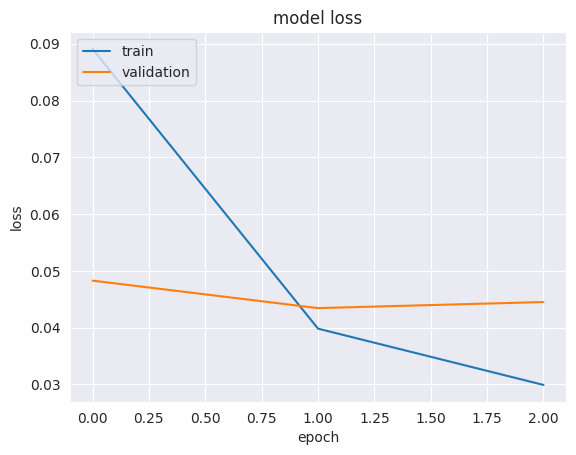

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

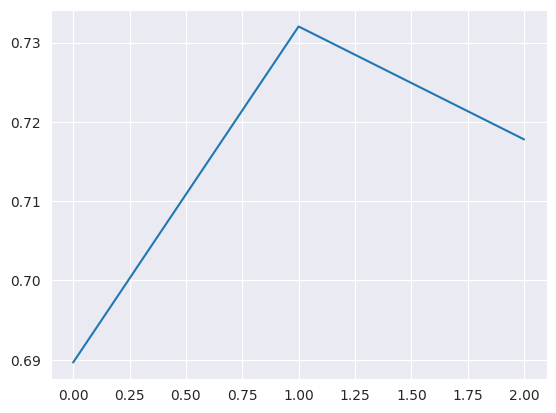

In [24]:
sns.set_style("darkgrid")
epoch_f1s = plt.plot(metrics.f1_scores)
plt.show()

In [28]:
# import json
#
# with open('../dataset/word2index.json', 'w') as outstream:
#     json.dump(word2index, outstream)
# with open('../dataset/sent_max_length.txt', 'w') as outfile:
#     outfile.write(str(sent_max_length))

In [27]:
# model_save_name = 'model_CWI.h5'
# path_dir = f"../model/{model_save_name}"
# model.save(path_dir)